# Mid-Course Project

Hi There, and thanks for your help. If you're reading this you've been selected to help on a secret initiative.

You will be helping us analyze a portion of data from a company we want to acquire, which could greatly improve the fortunes of Maven Mega Mart.

We'll be working with `project_transactions.csv` and briefly take a look at `product.csv`.

First, read in the transactions data and explore it.

* Take a look at the raw data, the datatypes, and cast `DAY`, `QUANTITY`, `STORE_ID`, and `WEEK_NO` columns to the smallest appropriate datatype. Check the memory reduction by doing so.
* Is there any missing data?
* How many unique households and products are there in the data? The fields household_key and Product_ID will help here.

In [1]:
import pandas as pd
import numpy as np

In [2]:
transactions = pd.read_csv("../project_data/project_transactions.csv")

In [3]:
transactions.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,1364,26984896261,1,842930,1,2.19,31742,0.00,1,0.0,0.0
1,1364,26984896261,1,897044,1,2.99,31742,-0.40,1,0.0,0.0
2,1364,26984896261,1,920955,1,3.09,31742,0.00,1,0.0,0.0
3,1364,26984896261,1,937406,1,2.50,31742,-0.99,1,0.0,0.0
4,1364,26984896261,1,981760,1,0.60,31742,-0.79,1,0.0,0.0


In [193]:
transactions.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   household_key      int64  
 1   BASKET_ID          int64  
 2   DAY                int64  
 3   PRODUCT_ID         int64  
 4   QUANTITY           int64  
 5   SALES_VALUE        float64
 6   STORE_ID           int64  
 7   RETAIL_DISC        float64
 8   WEEK_NO            int64  
 9   COUPON_DISC        float64
 10  COUPON_MATCH_DISC  float64
dtypes: float64(4), int64(7)
memory usage: 180.1 MB


In [4]:
#cast DAY, QUANTITY, STORE_ID, and WEEK_NO columns to the smallest appropriate datatype. 
#Check the memory reduction by doing so.

transactions = transactions.astype(
{ "DAY":"int64",
  "STORE_ID":"int8",
 "QUANTITY": "int64",
 "WEEK_NO":"int8"  
})

transactions.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   household_key      int64  
 1   BASKET_ID          int64  
 2   DAY                int64  
 3   PRODUCT_ID         int64  
 4   QUANTITY           int64  
 5   SALES_VALUE        float64
 6   STORE_ID           int8   
 7   RETAIL_DISC        float64
 8   WEEK_NO            int8   
 9   COUPON_DISC        float64
 10  COUPON_MATCH_DISC  float64
dtypes: float64(4), int64(5), int8(2)
memory usage: 151.5 MB


In [5]:
# Is there any missing data
transactions.isna().sum()

household_key        0
BASKET_ID            0
DAY                  0
PRODUCT_ID           0
QUANTITY             0
SALES_VALUE          0
STORE_ID             0
RETAIL_DISC          0
WEEK_NO              0
COUPON_DISC          0
COUPON_MATCH_DISC    0
dtype: int64

In [6]:
# How many unique households and products are there in the data? 
# The fields household_key and Product_ID will help here.

transactions["household_key"].nunique()

2099

In [7]:
transactions["PRODUCT_ID"].nunique()

84138

## Column Creation

Create two columns:

* A column that captures the `total_discount` by row (sum of `RETAIL_DISC`, `COUPON_DISC`)
* The percentage disount (`total_discount` / `SALES_VALUE`). Make sure this is positive (try `.abs()`).
* If the percentage discount is greater than 1, set it equal to 1. If it is less than 0, set it to 0. 
* Drop the individual discount columns (`RETAIL_DISC`, `COUPON_DISC`, `COUPON_MATCH_DISC`).

Feel free to overwrite the existing transaction DataFrame after making the modifications above.

In [8]:
transactions.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,1364,26984896261,1,842930,1,2.19,-2,0.00,1,0.0,0.0
1,1364,26984896261,1,897044,1,2.99,-2,-0.40,1,0.0,0.0
2,1364,26984896261,1,920955,1,3.09,-2,0.00,1,0.0,0.0
3,1364,26984896261,1,937406,1,2.50,-2,-0.99,1,0.0,0.0
4,1364,26984896261,1,981760,1,0.60,-2,-0.79,1,0.0,0.0


In [170]:
# create column that captures the total_discount by row (sum of RETAIL_DISC, COUPON_DISC)
# The percentage disount (total_discount / SALES_VALUE). Make sure this is positive (try .abs()).

#transactions = (
#transactions.assign(total_discount = transactions["RETAIL_DISC"] + transactions["COUPON_DISC"], 
                  # percent_discount = (lambda x: (x["total_discount"] / x["SALES_VALUE"]).abs())))

In [9]:
# create column that captures the total_discount by row (sum of RETAIL_DISC, COUPON_DISC)
# The percentage disount (total_discount / SALES_VALUE). Make sure this is positive (try .abs()).

transactions["total_discount"] = transactions["RETAIL_DISC"] + transactions["COUPON_DISC"]

In [214]:
#transactions.drop("percent_discount", axis = 1)

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,total_discount
0,1364,26984896261,1,842930,1,2.19,-2,0.00,1,0.0,0.0,0.00
1,1364,26984896261,1,897044,1,2.99,-2,-0.40,1,0.0,0.0,-0.40
2,1364,26984896261,1,920955,1,3.09,-2,0.00,1,0.0,0.0,0.00
3,1364,26984896261,1,937406,1,2.50,-2,-0.99,1,0.0,0.0,-0.99
4,1364,26984896261,1,981760,1,0.60,-2,-0.79,1,0.0,0.0,-0.79
...,...,...,...,...,...,...,...,...,...,...,...,...
2146306,1598,42305362535,711,92130,1,0.99,-100,0.00,102,0.0,0.0,0.00
2146307,1598,42305362535,711,114102,1,8.89,-100,0.00,102,0.0,0.0,0.00
2146308,1598,42305362535,711,133449,1,6.99,-100,0.00,102,0.0,0.0,0.00
2146309,1598,42305362535,711,6923644,1,4.50,-100,-0.49,102,0.0,0.0,-0.49


In [10]:
transactions["percent_discount"] = (transactions["total_discount"] / transactions["SALES_VALUE"]).abs()

In [206]:
# If the percentage discount is greater than 1, set it equal to 1. If it is less than 0, set it to 0.

#transactions["percent_discount"] = (
#transactions["percent_discount"]
         #  .where(transactions["percent_discount"] > 0, 0)
         #  .where(transactions["percent_discount"] < 1, 1.0))

TypeError: '>' not supported between instances of 'function' and 'int'

In [11]:
transactions["percent_discount"] = np.clip(transactions["percent_discount"], 0.0,1.0) 

In [12]:
transactions.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,total_discount,percent_discount
0,1364,26984896261,1,842930,1,2.19,-2,0.00,1,0.0,0.0,0.00,0.000000
1,1364,26984896261,1,897044,1,2.99,-2,-0.40,1,0.0,0.0,-0.40,0.133779
2,1364,26984896261,1,920955,1,3.09,-2,0.00,1,0.0,0.0,0.00,0.000000
3,1364,26984896261,1,937406,1,2.50,-2,-0.99,1,0.0,0.0,-0.99,0.396000
4,1364,26984896261,1,981760,1,0.60,-2,-0.79,1,0.0,0.0,-0.79,1.000000


In [13]:
# Drop the individual discount columns (RETAIL_DISC, COUPON_DISC, COUPON_MATCH_DISC).
transactions.drop(["RETAIL_DISC", "COUPON_DISC", "COUPON_MATCH_DISC"], inplace= True, axis = 1)

In [14]:
transactions.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,WEEK_NO,total_discount,percent_discount
0,1364,26984896261,1,842930,1,2.19,-2,1,0.00,0.000000
1,1364,26984896261,1,897044,1,2.99,-2,1,-0.40,0.133779
2,1364,26984896261,1,920955,1,3.09,-2,1,0.00,0.000000
3,1364,26984896261,1,937406,1,2.50,-2,1,-0.99,0.396000
4,1364,26984896261,1,981760,1,0.60,-2,1,-0.79,1.000000


## Overall Statistics

Calculate:

* The total sales (sum of `SALES_VALUE`), 
* Total discount (sum of `total_discount`)
* Overall percentage discount (sum of total_discount / sum of sales value)
* Total quantity sold (sum of `QUANTITY`).
* Max quantity sold in a single row. Inspect the row as well. Does this have a high discount percentage?
* Total sales value per basket (sum of sales value / nunique basket_id).
* Total sales value per household (sum of sales value / nunique household_key). 

In [39]:
transactions.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,WEEK_NO,total_discount,percent_discount
0,1364,26984896261,1,842930,1,2.19,-2,1,0.00,0.000000
1,1364,26984896261,1,897044,1,2.99,-2,1,-0.40,0.133779
2,1364,26984896261,1,920955,1,3.09,-2,1,0.00,0.000000
3,1364,26984896261,1,937406,1,2.50,-2,1,-0.99,0.396000
4,1364,26984896261,1,981760,1,0.60,-2,1,-0.79,1.000000


In [40]:
# The total sales (sum of SALES_VALUE)

total_sales = transactions["SALES_VALUE"].sum()
total_sales

6666243.499999999

In [41]:
#Total discount (sum of total_discount)
total_discount = transactions["total_discount"].sum()
total_discount

-1178658.0799999998

In [42]:
#Overall percentage discount (sum of total_discount / sum of sales value)
overall_pct_discount = (total_discount / total_sales) 
overall_pct_discount

-0.1768099350106248

In [43]:
#Total quantity sold (sum of QUANTITY).
transactions['QUANTITY'].sum()

216713611

In [44]:
#Max quantity sold in a single row. Inspect the row as well. Does this have a high discount percentage?
transactions["QUANTITY"].max()

89638

In [45]:
transactions["QUANTITY"].dtypes

dtype('int64')

In [46]:
transactions.loc[transactions["QUANTITY"].argmax()]

household_key       6.300000e+02
BASKET_ID           3.474915e+10
DAY                 5.030000e+02
PRODUCT_ID          6.534178e+06
QUANTITY            8.963800e+04
SALES_VALUE         2.500000e+02
STORE_ID           -1.280000e+02
WEEK_NO             7.300000e+01
total_discount     -1.345000e+01
percent_discount    5.380000e-02
Name: 1442095, dtype: float64

In [55]:
# transactions.loc[transactions["QUANTITY"] == 127 ]

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,WEEK_NO,total_discount,percent_discount


In [ ]:
.sort_values("percent_discount", ascending = False)

In [52]:
#Total sales value per basket (sum of sales value / nunique basket_id).

transactions["SALES_VALUE"].sum() / transactions["BASKET_ID"].nunique()

28.61797938516092

In [34]:
#Total sales value per household (sum of sales value / nunique household_key).

transactions["SALES_VALUE"].sum() / transactions["household_key"].nunique()

3175.9140066698424

## Household Analysis

* Plot the distribution of total sales value purchased at the household level. 
* What were the top 10 households by quantity purchased?
* What were the top 10 households by sales value?
* Plot the total sales value for our top 10 households by value, ordered from highest to lowest.


<Axes: ylabel='Frequency'>

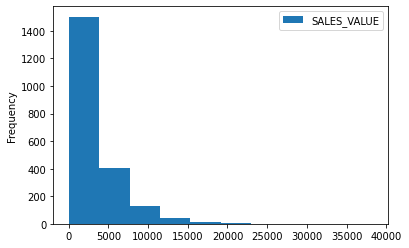

In [121]:
# Plot the distribution of total sales value purchased at the household level.
# aggregate transaction data to the household key and calculate sales by household key

transactions.groupby('household_key')[["SALES_VALUE"]].sum().plot.hist()

<Axes: ylabel='Frequency'>

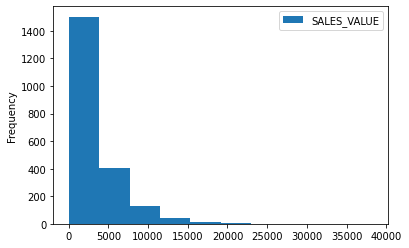

In [36]:
transactions.groupby("household_key").agg({"SALES_VALUE":"sum"}).plot.hist()

In [126]:
# What were the top 10 households by quantity purchased?

transactions.groupby(["household_key"])[["QUANTITY"]].sum().sort_values('QUANTITY', ascending = False).head(10)

,QUANTITY
household_key,
1023,4479917
755,3141769
1609,2146715
13,1863829
1430,1741892
1527,1734632
1762,1669880
707,1640193
1029,1496204


In [128]:
# What were the top 10 households by sales value?
top10_sales = transactions.groupby(["household_key"])[["SALES_VALUE"]].sum().sort_values('SALES_VALUE', ascending = False).head(10)
top10_sales

,SALES_VALUE
household_key,
1023,38319.79
1609,27859.68
1453,21661.29
1430,20352.99
718,19299.86
707,19194.42
1653,19153.75
1111,18894.72
982,18790.34


<Axes: xlabel='household_key'>

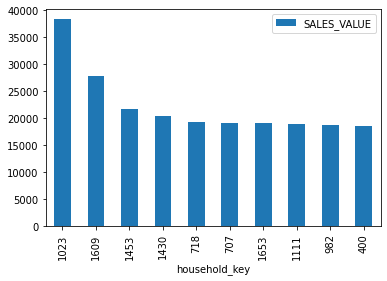

In [129]:
# Plot the total sales value for our top 10 households by value, ordered from highest to lowest.

top10_sales.plot.bar()

## Product Analysis

* Which products had the most sales by sales_value? Plot  a horizontal bar chart.
* Did the top 10 selling items have a higher than average discount rate?
* What was the most common `PRODUCT_ID` among rows with the households in our top 10 households by sales value?
* Look up the names of the  top 10 products by sales in the `products.csv` dataset.
* Look up the product name of the item that had the highest quantity sold in a single row.

In [130]:
transactions.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,total_discount,percent_discount
0,1364,26984896261,1,842930,1,2.19,-2,0.00,1,0.0,0.0,0.00,0.000000
1,1364,26984896261,1,897044,1,2.99,-2,-0.40,1,0.0,0.0,-0.40,0.133779
2,1364,26984896261,1,920955,1,3.09,-2,0.00,1,0.0,0.0,0.00,0.000000
3,1364,26984896261,1,937406,1,2.50,-2,-0.99,1,0.0,0.0,-0.99,0.396000
4,1364,26984896261,1,981760,1,0.60,-2,-0.79,1,0.0,0.0,-0.79,1.316667


In [241]:
top10_products = transactions.groupby("PRODUCT_ID")[["SALES_VALUE"]].sum().sort_values("SALES_VALUE", ascending = False).iloc[:10]

top10_products

,SALES_VALUE
PRODUCT_ID,
6534178,420154.13
6533889,42339.31
1029743,33894.75
1082185,24149.79
6533765,23831.14
6534166,23755.70
1106523,22931.01
916122,22749.02
995242,21229.72


<Axes: ylabel='PRODUCT_ID'>

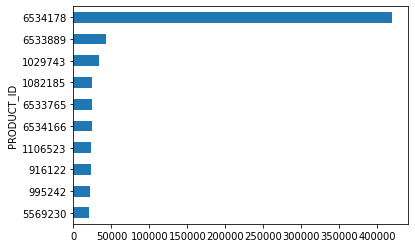

In [244]:
#Which products had the most sales by sales_value? Plot a horizontal bar chart.

top10_products["SALES_VALUE"].sort_values().plot.barh()


<Axes: ylabel='household_key'>

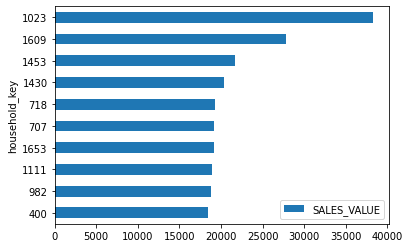

In [239]:
#Which products had the most sales by sales_value? Plot a horizontal bar chart.

top10_sales.sort_values("SALES_VALUE",ascending = True).plot.barh()

In [229]:
transactions['percent_discount'].mean()

0.2081415640825877

In [140]:
#Did the top 10 selling items have a higher than average discount rate?

top10_sales

,SALES_VALUE
household_key,
1023,38319.79
1609,27859.68
1453,21661.29
1430,20352.99
718,19299.86
707,19194.42
1653,19153.75
1111,18894.72
982,18790.34


In [233]:
#What was the most common PRODUCT_ID among rows with the households in our top 10 households by sales value?

transactions.groupby(["household_key", "PRODUCT_ID"])[["SALES_VALUE"]].sum().sort_values('SALES_VALUE', ascending = False).head(10)


,,SALES_VALUE
household_key,PRODUCT_ID,
1023,6533889,9444.06
755,6534178,7649.09
1430,6534178,4062.56
1527,6534178,4005.96
1762,6534178,3816.67
1029,6534178,3468.20
1314,6534178,3375.94
13,6534178,3205.09
1778,6534178,3202.03


In [246]:
# read in products data

products = pd.read_csv("../project_data/product.csv")

products.head()

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ


In [249]:
products

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ
...,...,...,...,...,...,...,...
92348,18293142,6384,DRUG GM,National,BOOKSTORE,PAPERBACK BOOKS,
92349,18293439,6393,DRUG GM,National,BOOKSTORE,CHILDRENS LOW END,
92350,18293696,6406,DRUG GM,National,BOOKSTORE,PAPERBACK BEST SELLER,
92351,18294080,6442,DRUG GM,National,BOOKSTORE,PAPERBACK BOOKS,


In [252]:
top10_products

,SALES_VALUE
PRODUCT_ID,
6534178,420154.13
6533889,42339.31
1029743,33894.75
1082185,24149.79
6533765,23831.14
6534166,23755.70
1106523,22931.01
916122,22749.02
995242,21229.72


In [251]:
#Look up the names of the top 10 products by sales in the products.csv dataset.

products.query("PRODUCT_ID in @top10_products.index")

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
16863,916122,4314,MEAT,National,CHICKEN,CHICKEN BREAST BONELESS,
25754,995242,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,
29657,1029743,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA
35576,1082185,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB
38262,1106523,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA
53097,5569230,1208,GROCERY,National,SOFT DRINKS,SOFT DRINKS 12/18&15PK CAN CAR,12 OZ
57171,6533765,69,KIOSK-GAS,Private,FUEL,GASOLINE-REG UNLEADED,
57181,6533889,69,MISC SALES TRAN,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
57216,6534166,69,MISC SALES TRAN,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
57221,6534178,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,


In [253]:
#Look up the product name of the item that had the highest quantity sold in a single row

products.query("PRODUCT_ID == 6534178")

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
57221,6534178,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
